# Descriptive Data Statistics 

In [133]:
library(ggplot2)
library(reshape2)
library(readr)
library(readxl)

In [134]:
data <- read_excel('/Users/gabriel/Documents/GitHub/GabrielDelC/Tesis data/Data final findex.xlsx')

data$Fecha <- as.Date(data$Fecha, format = "%d/%m/%y")
head(data)

Fecha,BZSCORE,NPL,GLOBAL_CAP,BANK_CON,CREDIT,INFLATION,GROWTH,CONSUM,INVEST,FIN_OPEN,VIX,TERMS,FINDEX
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2001-03-31,17.03940,10.393333,12.47667,1634.992,-32.4954417,2.0631384,1.21597305,-20.969594,-0.04639113,10.244489,26.33667,6.515126,0.006177982
2001-06-30,16.38170,10.193333,12.20000,1649.719,6.8619593,-1.2932459,1.59674395,-7.500232,-0.00461018,9.878376,22.39333,-3.828285,0.013128082
2001-09-30,16.50532,9.976667,12.70667,1621.507,-14.8054956,0.2450943,1.09513835,-5.460786,0.02447751,9.289471,26.15667,2.542387,0.000000000
2001-12-31,16.46407,9.456667,13.20333,1598.407,-6.9292332,-0.1491401,-0.01750847,-6.535581,0.05123269,7.806468,27.06667,8.485228,0.022969585
2002-03-31,16.58633,9.143333,12.99333,1567.966,2.1091937,-2.8883692,5.02173240,-1.497675,0.07397504,7.522508,20.02667,13.237194,0.109466353
2002-06-30,16.88802,8.480000,13.07000,1547.626,0.3882406,3.0843987,4.08667203,-2.901931,0.05411200,7.645399,22.43000,7.814029,0.207372555


In [135]:
data <- data[, !(colnames(data) %in% c("CONSUM", "INVEST"))]

In [136]:
# Excluir la columna no numérica (Fecha) y convertir el resto a numérico si es necesario
numeric_data <- data[sapply(data, is.numeric)]

# Calcular la matriz de correlaciones
cor_matrix <- cor(numeric_data, use = "pairwise.complete.obs") 

# Convertir la matriz de correlación a formato largo para ggplot2
cor_long <- melt(cor_matrix)

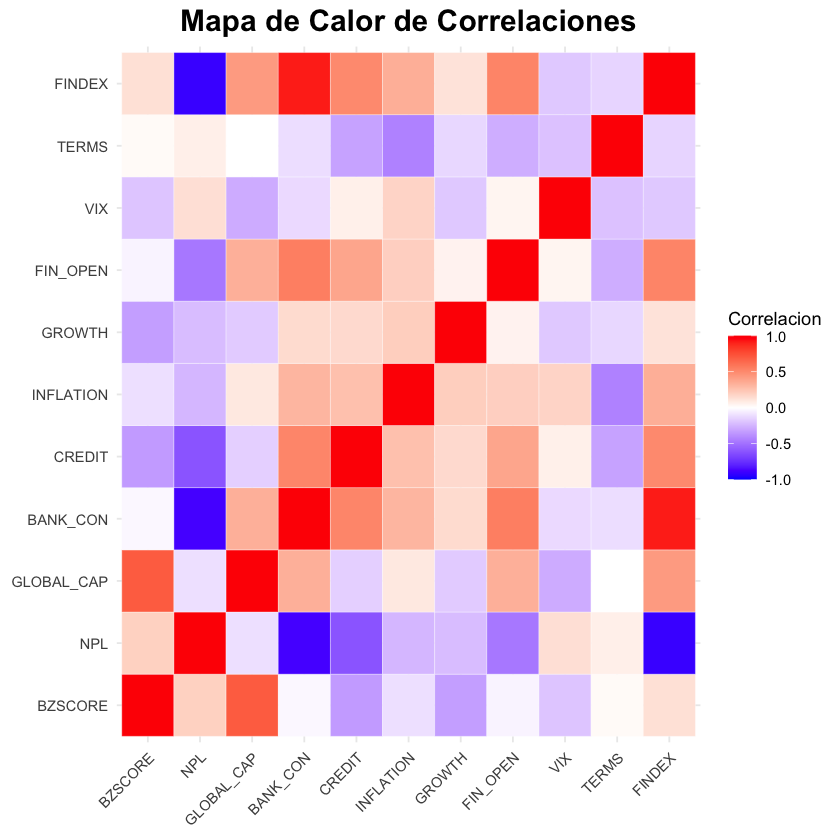

In [137]:
heatmap <- ggplot(cor_long, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(
    low = "blue", high = "red", mid = "white", 
    midpoint = 0, limit = c(-1, 1), space = "Lab", 
    name = "Correlacion"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5) # Título más grande y centrado
  ) +
  labs(
    x = NULL, 
    y = NULL, 
    title = "Mapa de Calor de Correlaciones"
  )

  heatmap

In [138]:
# Guardar el gráfico en formato PNG
#ggsave("Correlaciones.png", plot = heatmap, width = 10, height = 8, dpi = 300)

In [139]:
#install.packages("moments")

In [140]:
library(dplyr)
library(tidyr)
library(moments)

In [141]:
#install.packages("gridExtra")

In [142]:
library(ggplot2)
library(gridExtra)
library(grid)

In [143]:
variables <- names(numeric_data)
variables

[1] "BZSCORE"    "NPL"        "GLOBAL_CAP" "BANK_CON"   "CREDIT"    
 [6] "INFLATION"  "GROWTH"     "FIN_OPEN"   "VIX"        "TERMS"     
[11] "FINDEX"

In [144]:
# Ajustar gráficos eliminando los títulos de los ejes
plots <- lapply(variables, function(var) {
  ggplot(data, aes(x = Fecha, y = .data[[var]])) +
    geom_line(color = "blue", linewidth = 0.8) +  # Usar linewidth para las líneas
    theme_minimal() +
    labs(title = var, x = NULL, y = NULL) +  # Sin títulos en los ejes
    theme(
      plot.title = element_text(size = 25, face = "bold", hjust = 0.5),
      axis.text.x = element_text(size = 20),  # Ajustar tamaño del texto de los ejes
      axis.text.y = element_text(size = 20)
    )
})

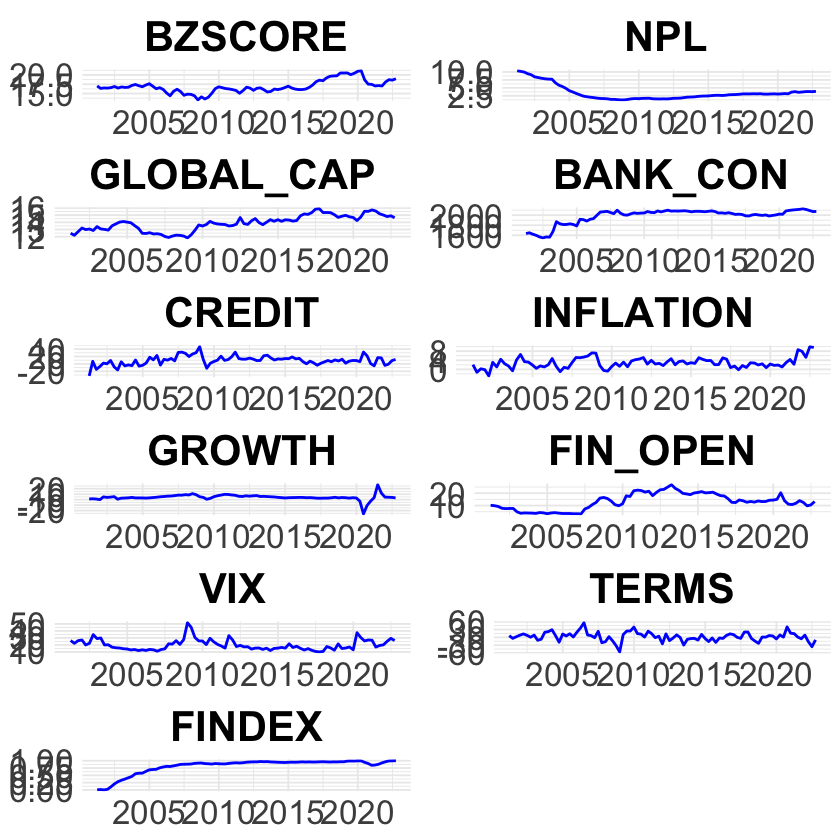

In [145]:
library(gridExtra)
library(grid)
grid.arrange(grobs = plots, ncol = 2, nrow = 6, 
             top = textGrob(NULL, gp = gpar(fontsize = 20, fontface = "bold")))

In [146]:
# Ajustar las dimensiones generales del gráfico
#png("Series de tiempo 4.png", width = 1800, height = 2000) # Aumentar dimensiones
#grid.arrange(grobs = plots, ncol = 2, nrow = 7, 
#             top = textGrob(NULL, gp = gpar(fontsize = 24, fontface = "bold")))
#dev.off() # Cerrar dispositivo gráfico


In [147]:
# install.packages("vars")

In [148]:
library(vars)

In [117]:
data_ts <- ts(data[, -1], start = c(2001, 1), frequency = 4)
head(data_ts)

BZSCORE,NPL,GLOBAL_CAP,BANK_CON,CREDIT,INFLATION,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX
17.03940,10.393333,12.47667,1634.992,-32.4954417,2.0631384,1.21597305,10.244489,26.33667,6.515126,0.006177982
16.38170,10.193333,12.20000,1649.719,6.8619593,-1.2932459,1.59674395,9.878376,22.39333,-3.828285,0.013128082
16.50532,9.976667,12.70667,1621.507,-14.8054956,0.2450943,1.09513835,9.289471,26.15667,2.542387,0.000000000
16.46407,9.456667,13.20333,1598.407,-6.9292332,-0.1491401,-0.01750847,7.806468,27.06667,8.485228,0.022969585
16.58633,9.143333,12.99333,1567.966,2.1091937,-2.8883692,5.02173240,7.522508,20.02667,13.237194,0.109466353
16.88802,8.480000,13.07000,1547.626,0.3882406,3.0843987,4.08667203,7.645399,22.43000,7.814029,0.207372555


In [87]:
lag_selection <- VARselect(data_ts, lag.max = 10, type = "const")
lag_selection$selection

Warning message in log(sigma.det):
"Se han producido NaNs"
Warning message in log(sigma.det):
"Se han producido NaNs"
Warning message in log(sigma.det):
"Se han producido NaNs"


AIC(n)  HQ(n)  SC(n) FPE(n) 
     7      7      7      6

In [88]:
var_model <- VAR(data_ts, p = 6, type = "const")
var_model


VAR Estimation Results:

Estimated coefficients for equation BZSCORE: 
Call:
BZSCORE = BZSCORE.l1 + NPL.l1 + GOBLAL_CAP.l1 + BANK_CON.l1 + CREDIT.l1 + INFLATION.l1 + GROWTH.l1 + FIN_OPEN.l1 + VIX.l1 + TERMS.l1 + FINDEX.l1 + BZSCORE.l2 + NPL.l2 + GOBLAL_CAP.l2 + BANK_CON.l2 + CREDIT.l2 + INFLATION.l2 + GROWTH.l2 + FIN_OPEN.l2 + VIX.l2 + TERMS.l2 + FINDEX.l2 + BZSCORE.l3 + NPL.l3 + GOBLAL_CAP.l3 + BANK_CON.l3 + CREDIT.l3 + INFLATION.l3 + GROWTH.l3 + FIN_OPEN.l3 + VIX.l3 + TERMS.l3 + FINDEX.l3 + BZSCORE.l4 + NPL.l4 + GOBLAL_CAP.l4 + BANK_CON.l4 + CREDIT.l4 + INFLATION.l4 + GROWTH.l4 + FIN_OPEN.l4 + VIX.l4 + TERMS.l4 + FINDEX.l4 + BZSCORE.l5 + NPL.l5 + GOBLAL_CAP.l5 + BANK_CON.l5 + CREDIT.l5 + INFLATION.l5 + GROWTH.l5 + FIN_OPEN.l5 + VIX.l5 + TERMS.l5 + FINDEX.l5 + BZSCORE.l6 + NPL.l6 + GOBLAL_CAP.l6 + BANK_CON.l6 + CREDIT.l6 + INFLATION.l6 + GROWTH.l6 + FIN_OPEN.l6 + VIX.l6 + TERMS.l6 + FINDEX.l6 + const 

   BZSCORE.l1        NPL.l1 GOBLAL_CAP.l1   BANK_CON.l1     CREDIT.l1 
 4.261944e-

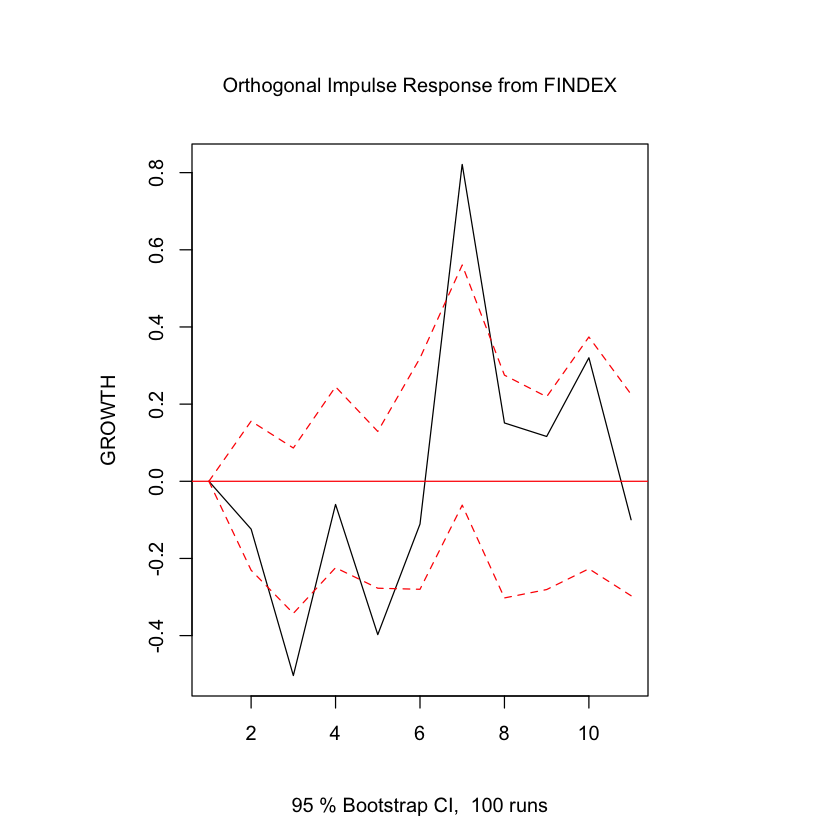

In [49]:
# Generación de las Impulse Response Functions (IRF)
irf_result <- irf(var_model, impulse = "FINDEX", response = "GROWTH", n.ahead = 10, boot = TRUE)

# Función para graficar la IRF de manera dinámica
plot_irf <- function(var_model, impulse_var, response_var, n_ahead = 10) {
  irf_result <- irf(var_model, impulse = impulse_var, response = response_var, n.ahead = n_ahead, boot = TRUE)
  plot(irf_result)
}

# Uso de la función para graficar IRF de "VIX" en "INFLATION"
plot_irf(var_model, impulse_var = "FINDEX", response_var = "GROWTH", n_ahead = 10)

In [95]:
# Calcular las raíces del modelo VAR (asumimos que ya tienes el modelo ajustado)
roots_values <- roots(var_model)

# Extraer las partes reales e imaginarias de las raíces
real_part <- Re(roots_values)
imaginary_part <- Im(roots_values)

# Calculamos el módulo de cada raíz
root_modulus <- sqrt(real_part^2 + imaginary_part^2)

# Verifica qué raíces están dentro del círculo unitario (estables)
stable_roots <- which(root_modulus <= 1)

# Asociamos las raíces estables con las variables correspondientes
stable_variables <- rep(variable_names, each = roots_per_variable)[stable_roots]

# Mostrar las variables que tienen raíces dentro del círculo unitario (estables)
print(stable_variables)

unstable_roots <- which(root_modulus > 1)
unstable_variables <- rep(variable_names, each = roots_per_variable)[unstable_roots]
print(unstable_variables)

 [1] "GOBLAL_CAP" "GOBLAL_CAP" "GOBLAL_CAP" "BANK_CON"   "BANK_CON"  
 [6] "BANK_CON"   "BANK_CON"   "BANK_CON"   "BANK_CON"   "CREDIT"    
[11] "CREDIT"     "CREDIT"     "CREDIT"     "CREDIT"     "CREDIT"    
[16] "INFLATION"  "INFLATION"  "INFLATION"  "INFLATION"  "INFLATION" 
[21] "INFLATION"  "GROWTH"     "GROWTH"     "GROWTH"     "GROWTH"    
[26] "GROWTH"     "GROWTH"     "FIN_OPEN"   "FIN_OPEN"   "FIN_OPEN"  
[31] "FIN_OPEN"   "FIN_OPEN"   "FIN_OPEN"   "VIX"        "VIX"       
[36] "VIX"        "VIX"        "VIX"        "VIX"        "TERMS"     
[41] "TERMS"      "TERMS"      "TERMS"      "TERMS"      "TERMS"     
[46] "FINDEX"     "FINDEX"     "FINDEX"     "FINDEX"     "FINDEX"    
[51] "FINDEX"    
 [1] "BZSCORE"    "BZSCORE"    "BZSCORE"    "BZSCORE"    "BZSCORE"   
 [6] "BZSCORE"    "NPL"        "NPL"        "NPL"        "NPL"       
[11] "NPL"        "NPL"        "GOBLAL_CAP" "GOBLAL_CAP" "GOBLAL_CAP"


In [149]:
data_df <- as.data.frame(data_ts)
colnames(data_df)

data_df <- data_df %>%
  mutate(
    BZSCORE_diff = c(NA, diff(log(BZSCORE))),
    NPL_diff = c(NA, diff(log(NPL))),
    GLOBAL_CAP_diff = c(NA, diff(log(GLOBAL_CAP)))  # Cambié GLOBAL_CAP a GOBLAL_CAP
  )

# Verifica el resultado
head(data_df)

[1] "BZSCORE"         "BANK_CON"        "CREDIT"          "INFLATION"      
 [5] "GROWTH"          "FIN_OPEN"        "VIX"             "TERMS"          
 [9] "FINDEX"          "BZSCORE_diff"    "NPL_diff"        "GLOBAL_CAP_diff"

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mi[39m In argument: `NPL_diff = c(NA, diff(log(NPL)))`.
[1mCaused by error in `diff()`:[22m
[33m![39m objeto 'NPL' no encontrado


In [150]:
# Eliminar NA generados por la diferencia logarítmica
data_df <- na.omit(data_df)
data_ts <- ts(data_df, start = c(2001, 2), frequency = 4)
data_ts <- data_ts[, !(colnames(data_ts) %in% c("NPL", "GLOBAL_CAP", "BANK_COP"))]
head(data_ts)

BZSCORE,BANK_CON,CREDIT,INFLATION,GROWTH,FIN_OPEN,VIX,TERMS,FINDEX,BZSCORE_diff,NPL_diff,GLOBAL_CAP_diff
16.38170,1649.719,6.8619593,-1.2932459,1.59674395,9.878376,22.39333,-3.8282854,0.01312808,-0.039363271,-0.01943066,-0.022424282
16.50532,1621.507,-14.8054956,0.2450943,1.09513835,9.289471,26.15667,2.5423874,0.00000000,0.007517724,-0.02148488,0.040690838
16.46407,1598.407,-6.9292332,-0.1491401,-0.01750847,7.806468,27.06667,8.4852275,0.02296959,-0.002502135,-0.05352907,0.038342533
16.58633,1567.966,2.1091937,-2.8883692,5.02173240,7.522508,20.02667,13.2371940,0.10946635,0.007398177,-0.03369494,-0.016032918
16.88802,1547.626,0.3882406,3.0843987,4.08667203,7.645399,22.43000,7.8140292,0.20737256,0.018025629,-0.07531457,0.005883122
16.46967,1566.905,9.2574397,1.0770445,4.62593964,7.639095,34.78667,0.6370715,0.28256867,-0.025083482,-0.02749725,-0.015938641


In [151]:
lag_selection <- VARselect(data_ts, lag.max = 10, type = "const")
lag_selection$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     7      7      7      7

In [ ]:
var_model <- VAR(data_ts, p = 6, type = "const")

# Generación de las Impulse Response Functions (IRF)
irf_result <- irf(var_model, impulse = "FINDEX", response = "GROWTH", n.ahead = 10, boot = TRUE)

# Función para graficar la IRF de manera dinámica
plot_irf <- function(var_model, impulse_var, response_var, n_ahead = 10) {
  irf_result <- irf(var_model, impulse = impulse_var, response = response_var, n.ahead = n_ahead, boot = TRUE)
  plot(irf_result)
}

# Uso de la función para graficar IRF de "VIX" en "INFLATION"
plot_irf(var_model, impulse_var = "FINDEX", response_var = "GROWTH", n_ahead = 10)

ERROR: Error in chol.default(sigma.u): la submatriz de orden 1 no es definida positiva
